(3024, 4032)


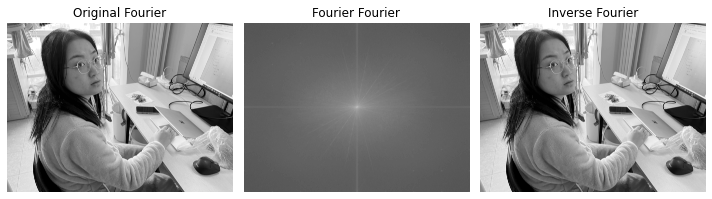

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#读取图像，iPhone注意照片格式，HEIC需要转变成JPG格式，可以在相机摄制里调整
img = cv.imread(filename='photos/qin.JPG', flags=0)
print (img.shape)

#快速傅里叶变换算法得到频率分布
f = np.fft.fft2(img)

# 默认结果中心点位置是在左上角，调用fftshift()函数转移到中间位置
fshift = np.fft.fftshift(f)       

# fft结果是复数, 其绝对值结果是振幅，再取对数
fimg = np.log(np.abs(fshift))

# 傅立叶逆变换
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

# 左边为原始图像，右边为频率分布图谱，其中越靠近中心位置频率越低，越亮（灰度值越高）的位置代表该频率的信号振幅越大
plt.figure(figsize=(10, 30))
plt.subplot(131)
plt.imshow(img, 'gray'), plt.title('Original Fourier')
plt.axis('off')
plt.subplot(132)
plt.imshow(fimg, 'gray'), plt.title('Fourier Fourier')
plt.axis('off')
plt.subplot(133)
plt.imshow(iimg, 'gray'), plt.title('Inverse Fourier')
plt.axis('off')

plt.tight_layout()
plt.show()

/Users/zexinliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in log
  


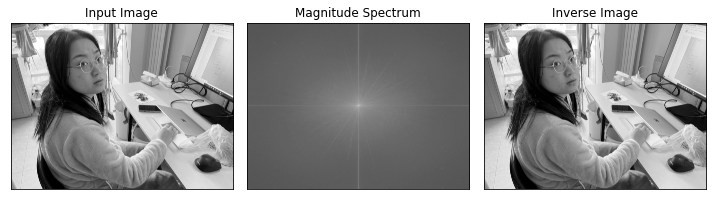

In [17]:
#傅里叶变换
dft = cv.dft(np.float32(img), flags = cv.DFT_COMPLEX_OUTPUT)

#将频谱低频从左上角移动至中心位置
dft_shift = np.fft.fftshift(dft)

#频谱图像双通道复数转换为0-255区间
result = 20 * np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

#傅里叶逆变换
ishift = np.fft.ifftshift(dft_shift)
iimg = cv.idft(ishift)
iresult = cv.magnitude(iimg[:,:,0], iimg[:,:,1])

plt.figure(figsize=(10, 30))
plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(result, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(iresult, cmap = 'gray')
plt.title('Inverse Image'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()